In [1]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
model = Sequential()
model.add(Dense(20,input_dim=5 , activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam", metrics=['mean_squared_error'])


In [3]:
# from keras_visualizer import visualizer
# visualizer(model,file_name="sohrab",file_format="png")

In [42]:
df=pd.read_csv(r"D:\sohrab\github\ai\co2.csv")
df.head(10)

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [43]:
df.describe()

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,522.000000


In [44]:
x=df.drop("out1",axis=1)
y=df.out1

In [45]:
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.8)



In [46]:
h=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
185/185 [==============================] - 0s 847us/step - loss: 49686.0391 - mean_squared_error: 49686.0391
Epoch 2/100
185/185 [==============================] - 0s 789us/step - loss: 22001.1367 - mean_squared_error: 22001.1367
Epoch 3/100
185/185 [==============================] - 0s 608us/step - loss: 4456.3662 - mean_squared_error: 4456.3662
Epoch 4/100
185/185 [==============================] - 0s 716us/step - loss: 744.4249 - mean_squared_error: 744.4249
Epoch 5/100
185/185 [==============================] - 0s 835us/step - loss: 531.7413 - mean_squared_error: 531.7413
Epoch 6/100
185/185 [==============================] - 0s 882us/step - loss: 528.0737 - mean_squared_error: 528.0737
Epoch 7/100
185/185 [==============================] - 0s 684us/step - loss: 526.9438 - mean_squared_error: 526.9438
Epoch 8/100
185/185 [==============================] - 0s 653us/step - loss: 526.4073 - mean_squared_error: 526.4073
Epoch 9/100
185/185 [==============================] -

In [47]:
y_pred=model.predict(X_test)

47/47 [==============================] - 0s 752us/step


In [48]:
y_pred

array([[181.4412 ],
       [211.65445],
       [249.09868],
       ...,
       [304.44806],
       [312.78793],
       [181.24374]], dtype=float32)

In [49]:
y_test

539     175
2274    211
2003    244
4479    249
780     246
       ... 
1738    230
6541    296
2525    302
1336    274
4880    180
Name: out1, Length: 1477, dtype: int64

In [50]:
test=np.array([[3,6,13.1,8.8,11.2]])
pred=model.predict(test)
pred


1/1 [==============================] - 0s 29ms/step


array([[260.62683]], dtype=float32)

In [51]:
import matplotlib.pyplot as plt
h.history['loss']

[49686.0390625,
 22001.13671875,
 4456.3662109375,
 744.4248657226562,
 531.7413330078125,
 528.07373046875,
 526.9437866210938,
 526.4072875976562,
 525.1231079101562,
 524.0468139648438,
 522.5464477539062,
 521.4539794921875,
 519.7442016601562,
 517.9705810546875,
 516.374267578125,
 514.7201538085938,
 512.5496826171875,
 510.0181579589844,
 508.0094909667969,
 506.2765197753906,
 502.6463623046875,
 499.8024597167969,
 495.5747985839844,
 492.862548828125,
 489.06536865234375,
 485.58349609375,
 482.7841491699219,
 477.15093994140625,
 474.24078369140625,
 469.04736328125,
 462.3160400390625,
 460.84588623046875,
 455.0269470214844,
 448.67462158203125,
 444.8826599121094,
 440.8865051269531,
 434.6638488769531,
 430.8641662597656,
 425.365234375,
 421.1186218261719,
 415.5752258300781,
 411.8584899902344,
 408.1282653808594,
 403.3871765136719,
 399.4084167480469,
 395.8199462890625,
 391.44122314453125,
 386.7868957519531,
 383.6646423339844,
 378.7646484375,
 375.5434265136719

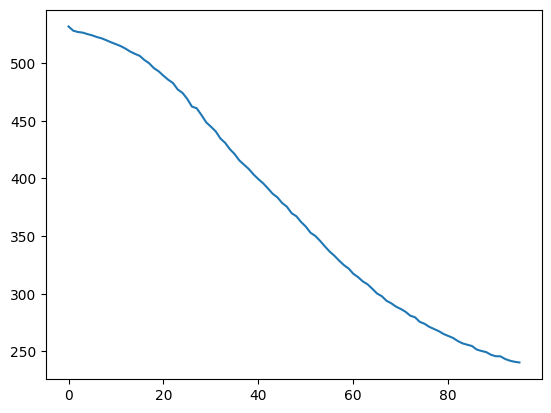

In [55]:
plt.plot(h.history['loss'][4::])